<a href="https://colab.research.google.com/github/Arthurads-rj/machine-learning-portf-lio/blob/main/ML1_Notas_de_Alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso do algoritmo Linear Regression

Nesse projeto, foi usado o algoritmo de regressão linear para fazer as previsões das **notas finais** de alunos em uma escola.

Esse algoritmo foi escolhido por conta da situação e facilidade de uso. Como eu estava mexendo só com números inteiros, esse algoritmo é o mais indicado.

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Depois de importar as bibliotecas necessárias, usei o comando describe() para saber se tinha valores faltando na tabela, além de outras curiosidades interessantes que talvez fossem vir a ser úteis para a análise de dados.

In [ ]:
dados = pd.read_csv('../content/drive/MyDrive/Planilhas/student-mat.csv')

dados.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


E aqui, usei o comando head() para ver as cinco primeiras linhas da tabela para ter uma noção dos dados apresentados.

Tenham em mente que G1, G2 E G3 é, respectivamente, Grade 1 (Nota 1), Grade 2 (Nota 2) e Grade 3 (Nota 3).

In [ ]:
dados.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Aqui esta todo o código utilizado. Usei features que achei que seriam relevantes para a máquina prever como o tempo de estudo, a primeira e a segunda nota, falhas, tempo livre e faltas.

no final, a precisão das previsões ficaram com uma media de 77%~87%.

20% dos dados da tabela foram usados para treinar a máquina para as previsões e os resultados podem ser arredondados.

Na parte de Notas, é para se ler como:
Notas: [G1], [G2], [Tempo de estudo], [Falhas], [Faltas], [Tempo Livre] 



In [ ]:
dados_features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'freetime']

prever = 'G3'
#features usados
X = np.array(dados[dados_features])

y = np.array(dados[prever])

x_treino, x_teste, y_treino, y_teste  = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

linear = linear_model.LinearRegression()

linear.fit(x_treino, y_treino)
prec = linear.score(x_teste, y_teste)

print(f'Precisão: {prec:.0%}')

previsoes = linear.predict(x_teste)
for x in range(len(previsoes)):
  print(f'Previsão: {previsoes[x]:.2f}, Notas: {x_teste[x]}, Resultado final: {y_teste[x]}')
  print()


Precisão: 87%
Previsão: 7.61, Notas: [5 9 2 2 6 4], Resultado final: 7

Previsão: 12.00, Notas: [13 12  1  0  0  3], Resultado final: 12

Previsão: 15.22, Notas: [14 15  1  0  3  3], Resultado final: 16

Previsão: 13.71, Notas: [13 14  3  0  6  2], Resultado final: 14

Previsão: 8.71, Notas: [10  9  2  0  4  4], Resultado final: 9

Previsão: 8.45, Notas: [8 9 1 0 5 2], Resultado final: 9

Previsão: 9.54, Notas: [11 10  2  0  0  3], Resultado final: 10

Previsão: 8.30, Notas: [10  9  3  0  2  3], Resultado final: 10

Previsão: 12.83, Notas: [15 13  3  2 14  1], Resultado final: 13

Previsão: 11.96, Notas: [11 12  2  0 10  3], Resultado final: 13

Previsão: 8.41, Notas: [8 9 2 0 4 4], Resultado final: 10

Previsão: 16.29, Notas: [17 16  2  0  0  3], Resultado final: 17

Previsão: -0.45, Notas: [11  0  3  0  0  3], Resultado final: 0

Previsão: 13.21, Notas: [14 13  2  0  4  4], Resultado final: 13

Previsão: 8.01, Notas: [10  8  2  0 10  4], Resultado final: 8

Previsão: 12.19, Notas: [1

# Gráficos
Logo abaixo, temos gráficos mostrando a correlação entre tempo de estudo, tempo livre, faltas e falhas com a nota final.

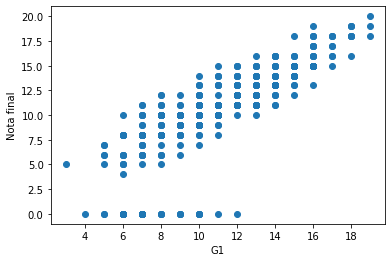

In [ ]:
pyplot.scatter(dados['G1'], dados['G3'])
pyplot.xlabel('Primeira Nota')
pyplot.ylabel('Nota final')
pyplot.show()

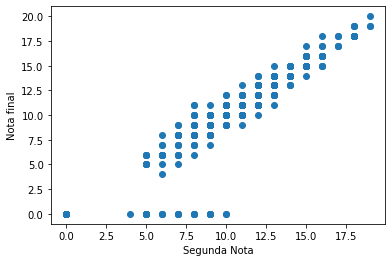

In [ ]:
pyplot.scatter(dados['G2'], dados['G3'])
pyplot.xlabel('Segunda Nota')
pyplot.ylabel('Nota final')
pyplot.show()

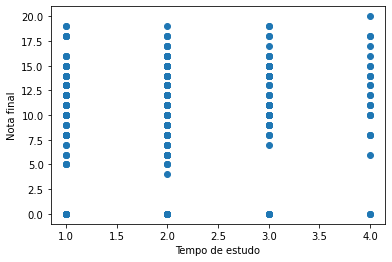

In [ ]:
pyplot.scatter(dados['studytime'], dados['G3'])
pyplot.xlabel('Tempo de estudo')
pyplot.ylabel('Nota final')
pyplot.show()

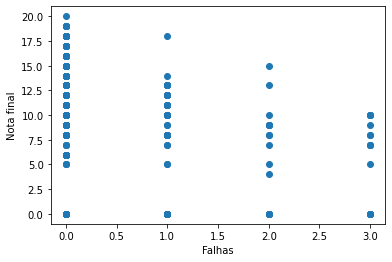

In [ ]:
pyplot.scatter(dados['failures'], dados['G3'])
pyplot.xlabel('Falhas')
pyplot.ylabel('Nota final')
pyplot.show()

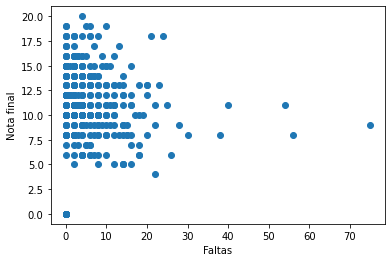

In [ ]:
pyplot.scatter(dados['absences'], dados['G3'])
pyplot.xlabel('Faltas')
pyplot.ylabel('Nota final')
pyplot.show()

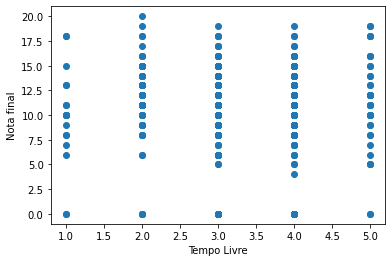

In [ ]:
pyplot.scatter(dados['freetime'], dados['G3'])
pyplot.xlabel('Tempo Livre')
pyplot.ylabel('Nota final')
pyplot.show()

Vimos que:


*   Alunos com o maior tempo de estudo tem tendência a conseguir a nota máxima.
*   Alunos com grande numero de falhas não conseguiriam uma boa nota final.
*   Alunos com uma média de duas(2) horas de tempo livre teriam um bom desempenho.
*   Alunos com poucas faltas teriam um melhor desempenho que aqueles com muitas faltas.

